In [5]:

import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Apr_17_19:36:51_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.5, V12.5.40
Build cuda_12.5.r12.5/compiler.34177558_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6


In [ ]:

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from matplotlib import pyplot as plt

In [7]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/train/coco_annotations.json", "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/train")
register_coco_instances("my_dataset_val", {}, "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/val/coco_annotations.json", "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/val")


In [8]:
train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")
val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

[03/08 01:53:28 d2.data.datasets.coco]: Loaded 465 images in COCO format from C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/train/coco_annotations.json
[03/08 01:53:28 d2.data.datasets.coco]: Loaded 100 images in COCO format from C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/val/coco_annotations.json


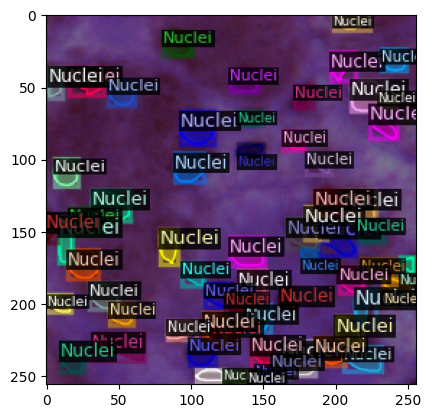

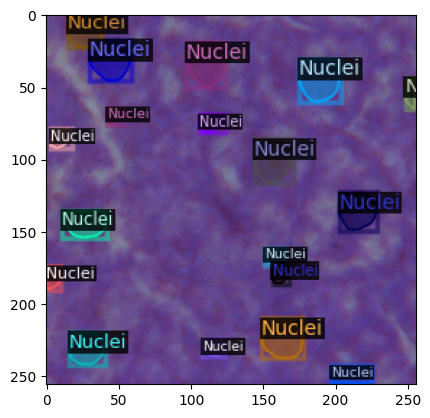

In [ ]:

for d in random.sample(train_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

### Training


In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  
cfg.SOLVER.IMS_PER_BATCH = 2  
cfg.SOLVER.BASE_LR = 0.00025  
cfg.SOLVER.MAX_ITER = 1000   
cfg.SOLVER.STEPS = []       
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False) 

[03/08 01:53:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

In [ ]:
trainer.train() 

[03/08 01:53:30 d2.engine.train_loop]: Starting training from iteration 0


c:\Users\Kunal Tilaganji\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/08 01:53:44 d2.utils.events]:  eta: 0:07:21  iter: 19  total_loss: 5.244  loss_cls: 0.7091  loss_box_reg: 0.4794  loss_mask: 0.6948  loss_rpn_cls: 3.09  loss_rpn_loc: 0.2171    time: 0.4444  last_time: 0.4492  data_time: 0.1787  last_data_time: 0.0011   lr: 4.9953e-06  max_mem: 1892M
[03/08 01:54:05 d2.utils.events]:  eta: 0:06:54  iter: 39  total_loss: 3.42  loss_cls: 0.6523  loss_box_reg: 0.535  loss_mask: 0.6905  loss_rpn_cls: 1.361  loss_rpn_loc: 0.1882    time: 0.4468  last_time: 0.4723  data_time: 0.0013  last_data_time: 0.0013   lr: 9.9902e-06  max_mem: 1915M
[03/08 01:54:14 d2.utils.events]:  eta: 0:06:44  iter: 59  total_loss: 2.646  loss_cls: 0.6023  loss_box_reg: 0.6775  loss_mask: 0.6807  loss_rpn_cls: 0.5096  loss_rpn_loc: 0.2091    time: 0.4392  last_time: 0.4768  data_time: 0.0013  last_data_time: 0.0010   lr: 1.4985e-05  max_mem: 1915M
[03/08 01:54:22 d2.utils.events]:  eta: 0:06:31  iter: 79  total_loss: 2.413  loss_cls: 0.5543  loss_box_reg: 0.6475  loss_mask: 0.6

KeyboardInterrupt: 

In [ ]:

%load_ext tensorboard
%tensorboard --logdir "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/models/" --port 6007

Reusing TensorBoard on port 6007 (pid 15960), started 3 days, 6:28:23 ago. (Use '!kill 15960' to kill it.)

In [ ]:
import yaml
import os

config_yaml_path = "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/models/config-5k_iter.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)


os.rename(os.path.join(cfg.OUTPUT_DIR, "model_final.pth"), os.path.join(cfg.OUTPUT_DIR, "model_10k_iter.pth"))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/models\\model_final.pth' -> 'C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/models\\model_10k_iter.pth'

### Inference & Evaluation using  the trained model


In [ ]:

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_10k_iter.pth")  
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2   
predictor = DefaultPredictor(cfg)

[03/08 01:57:06 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/models\model_10k_iter.pth ...


c:\Users\Kunal Tilaganji\AppData\Local\Programs\Python\Python312\Lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torc

In [15]:

from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_test", {}, "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test/coco_annotations.json", "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test")
test_metadata = MetadataCatalog.get("my_dataset_test")
test_dataset_dicts = DatasetCatalog.get("my_dataset_test")

[03/08 01:57:07 d2.data.datasets.coco]: Loaded 100 images in COCO format from C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test/coco_annotations.json


In [ ]:
import cv2
import random
from detectron2.utils.visualizer import Visualizer, ColorMode

for d in random.sample(test_dataset_dicts, 1):  
    im = cv2.imread(d["file_name"])
    outputs2 = predictor(im)
    outputs2 = predictor(im)

    scores = outputs2["instances"].scores
    threshold = 0.4
    filtered_indices = [i for i, score in enumerate(scores) if score > threshold]
    outputs2["instances"] = outputs2["instances"][filtered_indices]

    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata,
                   scale=1,
                   instance_mode=ColorMode.IMAGE_BW   
    )
    out = v.draw_instance_predictions(outputs2["instances"].to("cpu"))
    
    cv2.imshow("Original Image", im[:, :, ::-1])
    cv2.imshow("Predictions", out.get_image()[:, :, ::-1])
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Average Precision & recall

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("my_dataset_test", output_dir="./output")
test_loader = build_detection_test_loader(cfg, "my_dataset_test")
print(inference_on_dataset(predictor.model, test_loader, evaluator))


[03/08 02:01:50 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[03/08 02:01:50 d2.data.datasets.coco]: Loaded 100 images in COCO format from C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test/coco_annotations.json
[03/08 02:01:50 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   Nuclei   | 5040         |
|            |              |
[03/08 02:01:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[03/08 02:01:50 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[03/08 02:01:50 d2.data.common]: Serializing 100 elements to byte tensors and concatenating them all ...
[03/08 02:01:50 d2.data.common]: Serialized dataset takes 1.31 MiB

In [ ]:

new_im = cv2.imread("C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test/human_kidney_02.png")
outputs = predictor(new_im)


v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


cv2.imshow("Original Image", new_im[:, :, ::-1])
cv2.imshow("Predictions", out.get_image()[:, :, ::-1])


cv2.waitKey(0)
cv2.destroyAllWindows()

Segmenting imgaes and saving object level information into a csv file

In [27]:
import csv
from skimage.measure import regionprops, label

In [ ]:

input_images_directory = "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test/"


output_csv_path = "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test_results/output_objects.csv"


output_dir_name = os.path.dirname(output_csv_path)


if not os.path.exists(output_dir_name):
    
    os.makedirs(output_dir_name)



valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']


with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

   
    csvwriter.writerow(["File Name", "Class Name", "Object Number", "Area", "Centroid", "BoundingBox"])

    
    for image_filename in os.listdir(input_images_directory):
        
        if not any(image_filename.lower().endswith(ext) for ext in valid_extensions):
            continue

        image_path = os.path.join(input_images_directory, image_filename)
        new_im = cv2.imread(image_path)

        
        outputs = predictor(new_im)

        
        mask = outputs["instances"].pred_masks.to("cpu").numpy().astype(bool)

        
        class_labels = outputs["instances"].pred_classes.to("cpu").numpy()

        
        labeled_mask = label(mask)
        props = regionprops(labeled_mask)

        
        for i, prop in enumerate(props):
            object_number = i + 1
            area = prop.area
            centroid = prop.centroid
            bounding_box = prop.bbox

            
            if i < len(class_labels):
                class_label = class_labels[i]
                class_name = test_metadata.thing_classes[class_label]
            else:
                class_name = 'Unknown'

            csvwriter.writerow([image_filename, class_name, object_number, area, centroid, bounding_box])

print("Object-level information saved to CSV file.")

Object-level information saved to CSV file.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(output_csv_path)

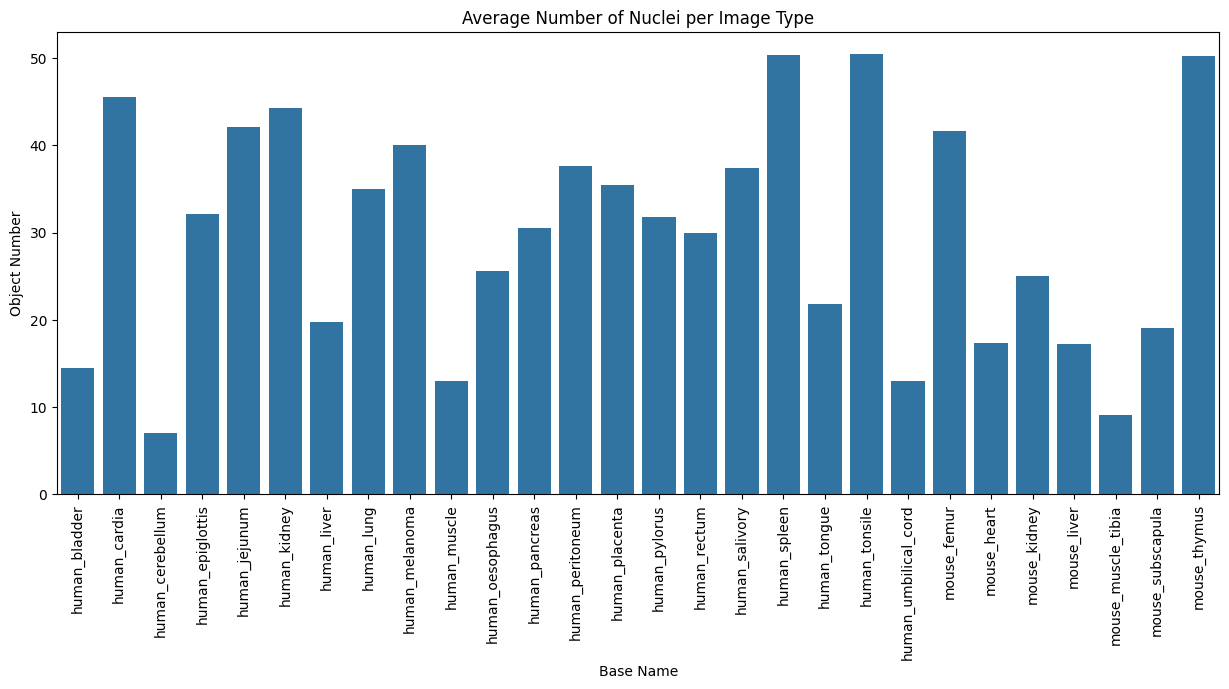

In [ ]:

df['Base Name'] = df['File Name'].str.rsplit('_', n=1).str[0]


avg_nuclei_per_base_name = df.groupby('Base Name')['Object Number'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_nuclei_per_base_name, x='Base Name', y='Object Number')
plt.title('Average Number of Nuclei per Image Type')
plt.xticks(rotation=90)
plt.show()


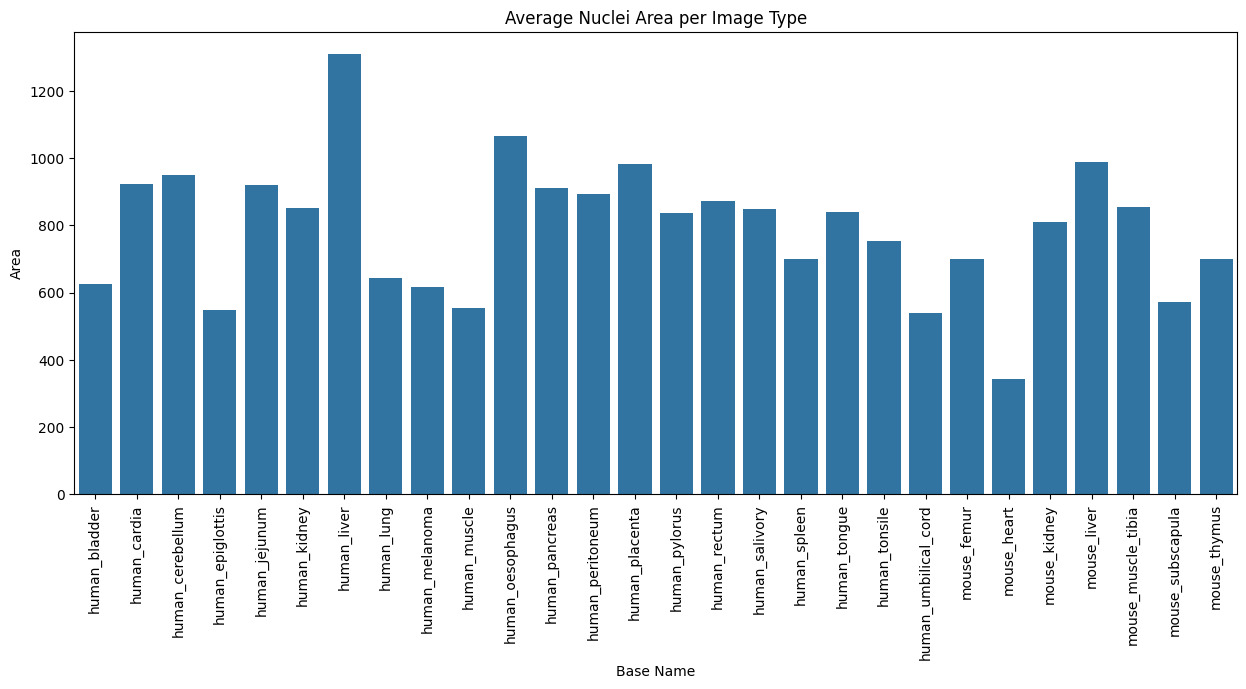

In [ ]:

avg_area_per_base_name = df.groupby('Base Name')['Area'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_area_per_base_name, x='Base Name', y='Area')
plt.title('Average Nuclei Area per Image Type')
plt.xticks(rotation=90)
plt.show()

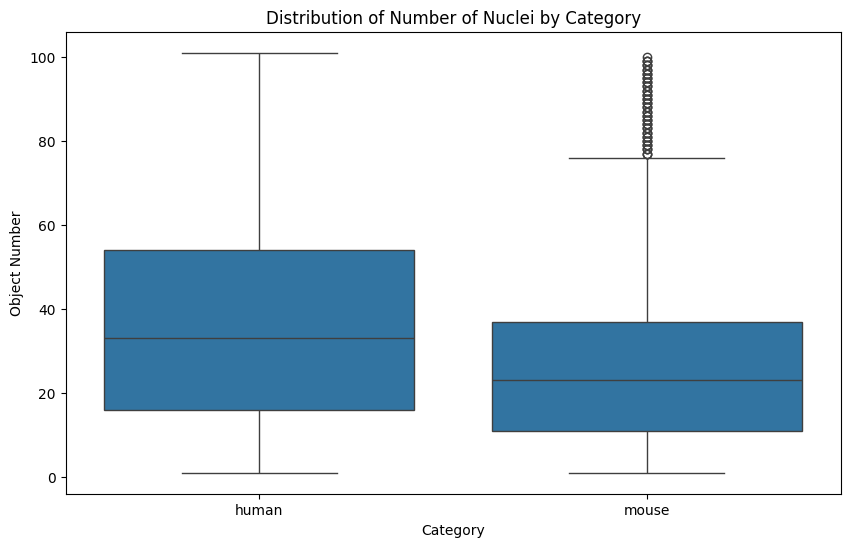

In [ ]:


df['Category'] = df['File Name'].str.split('_').str[0]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Object Number')
plt.title('Distribution of Number of Nuclei by Category')
plt.show()

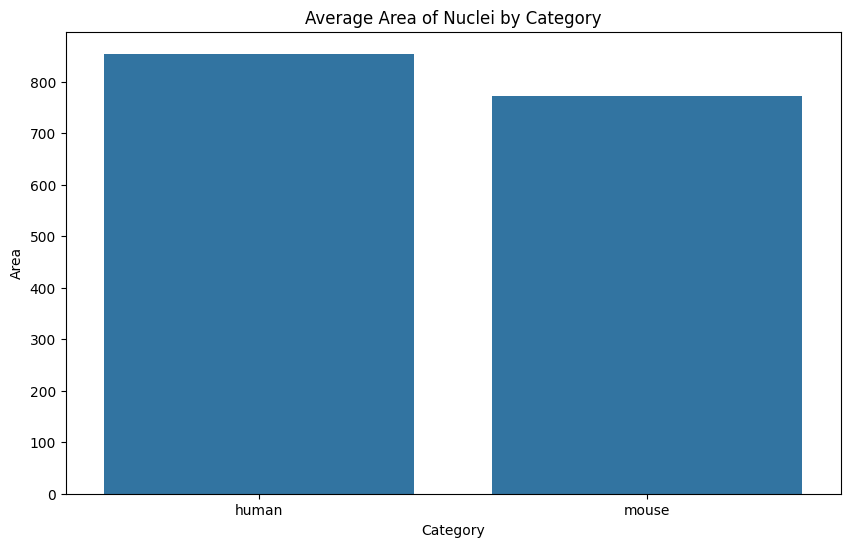

In [ ]:


avg_area_by_category = df.groupby('Category')['Area'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_area_by_category, x='Category', y='Area')
plt.title('Average Area of Nuclei by Category')
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from skimage.measure import label
from detectron2.utils.visualizer import Visualizer


input_images_directory = "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test/"


output_directory = "C:/Users/Kunal Tilaganji/OneDrive/Desktop/Desktop/Coding/Deep Learning Projects/Nuclei segmentation/COCO_output/test_results_labeled_masks"


for image_filename in os.listdir(input_images_directory):
    
    if not image_filename.lower().endswith('.png'):
        continue

    image_path = os.path.join(input_images_directory, image_filename)
    new_im = cv2.imread(image_path)

    
    outputs = predictor(new_im)

    
    binary_mask = outputs["instances"].pred_masks.to("cpu").numpy().astype(np.uint8)

    combined_mask = np.sum(binary_mask, axis=0)
    labeled_mask = label(combined_mask)

   
    result_filename = os.path.splitext(image_filename)[0] + "_result.png"
    output_path = os.path.join(output_directory, result_filename)

    
    cv2.imwrite(output_path, labeled_mask.astype(np.uint16))

print("Segmentation of all images completed.")


Segmentation of all images completed.


In [ ]:
import cv2
import numpy as np


img = np.zeros((400, 400, 3), dtype=np.uint8)
cv2.imshow("Test Window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()